
ANALISIS EXPLORATORIO DE DATOS.
DATASET: MOVIES


In [1]:
# librerias usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

In [2]:
# dataset
df_movies = pd.read_csv(r"C:\Users\romin\Documents\PROGRAMACION\CIENCIA DE DATOS\HENRY\LABS\PROYECTO INDIVIDUAL\Repositorio PI 01 MLOps\datasets\df_movies_final.csv", parse_dates = ['release_date'])

VISUALIZACION DEL CONTENIDO E INFORMACION GENERAL DEL SET

In [3]:
df_movies.shape

(45375, 23)

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45375 entries, 0 to 45374
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             45375 non-null  int64         
 1   belongs_to_collection  4488 non-null   object        
 2   budget                 45375 non-null  int64         
 3   genres                 45375 non-null  object        
 4   id                     45375 non-null  int64         
 5   original_language      45364 non-null  object        
 6   overview               44434 non-null  object        
 7   popularity             45375 non-null  float64       
 8   production_companies   45375 non-null  object        
 9   production_countries   45375 non-null  object        
 10  release_date           45375 non-null  datetime64[ns]
 11  revenue                45375 non-null  float64       
 12  runtime                45129 non-null  float64       
 13  s

In [5]:
df_movies.head()

,Unnamed: 0,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return
0,0,Toy Story Collection,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],...,['English'],Released,NaN,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],1995,12.45
1,1,NaN,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],...,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],1995,4.04
2,2,Grumpy Old Men Collection,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],...,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],1995,0.00
3,3,NaN,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],...,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],1995,5.09
4,4,Father of the Bride Collection,0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],...,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],1995,0.00


In [6]:
df_movies.tail()

,Unnamed: 0,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return
45370,45460,NaN,0,"['Drama', 'Action', 'Romance']",30840,en,"Yet another version of the classic epic, with ...",5.683753,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",...,['English'],Released,NaN,Robin Hood,5.7,26.0,"['Patrick Bergin', 'Uma Thurman', 'David Morri...",['John Irvin'],1991,0.0
45371,45462,NaN,0,['Drama'],111109,tl,An artist struggles to finish his work while a...,0.178241,['Sine Olivia'],['Philippines'],...,[''],Released,NaN,Century of Birthing,9.0,3.0,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio...",['Lav Diaz'],2011,0.0
45372,45463,NaN,0,"['Action', 'Drama', 'Thriller']",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,['American World Pictures'],['United States of America'],...,['English'],Released,A deadly game of wits.,Betrayal,3.8,6.0,"['Erika Eleniak', 'Adam Baldwin', 'Julie du Pa...",['Mark L. Lester'],2003,0.0
45373,45464,NaN,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,['Yermoliev'],['Russia'],...,[],Released,NaN,Satan Triumphant,0.0,0.0,"['Iwan Mosschuchin', 'Nathalie Lissenko', 'Pav...",['Yakov Protazanov'],1917,0.0
45374,45465,NaN,0,[],461257,en,50 years after decriminalisation of homosexual...,0.163015,[],['United Kingdom'],...,['English'],Released,NaN,Queerama,0.0,0.0,[],['Daisy Asquith'],2017,0.0


In [7]:
df_movies.columns

Index(['Unnamed: 0', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'release_year', 'return'],
      dtype='object')



TEMATICAS
Se presentan visualmente en un Wordcloud los conceptos mas frecuentes en los títulos y en la sinopsis de cada película.


Palabras con mayor frecuencia en Títulos

In [8]:
titulos_txt = ' '.join(df_movies['title'].astype(str))
stopwords2 = STOPWORDS
wc2 = WordCloud(background_color = 'white', stopwords = stopwords2, height = 600, width = 400)
wc2.generate(titulos_txt)

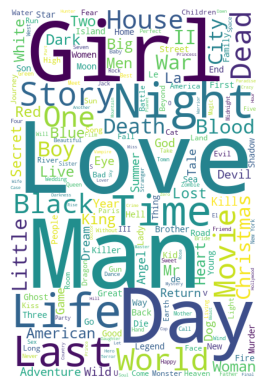

In [9]:
plt.imshow(wc2)
plt.axis('off')
plt.show()

Palabras con mayor frecuencia en Overview

In [10]:
overview_txt = ' '.join(df_movies['overview'].astype(str))
stopwords2 = STOPWORDS
wc2 = WordCloud(background_color = 'white', stopwords = stopwords2, height = 600, width = 400)
wc2.generate(titulos_txt)

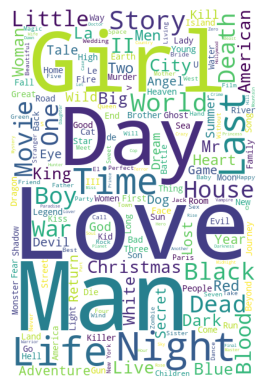

In [11]:
plt.imshow(wc2)
plt.axis('off')
plt.show()



PELICULAS POR MES DE ESTRENO



In [12]:
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def obtener_mes(x):
    try:
        return meses[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
    

df_movies['mes'] = df_movies['release_date'].apply(obtener_mes)
    

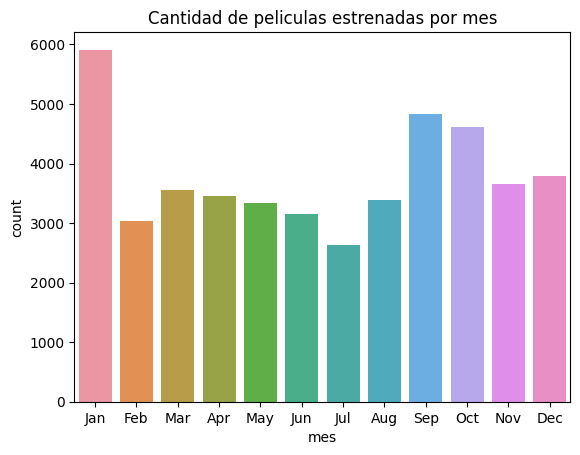

In [13]:
plt.title('Cantidad de peliculas estrenadas por mes')
sns.countplot(x = 'mes', data = df_movies, order = meses)
plt.show()




50 películas con mayor puntuación 



In [15]:
mas_populares = df_movies.sort_values(by='popularity', ascending=False)
campos = ['title','belongs_to_collection','release_year', 'genres', 'cast', 'crew', 'revenue']
mas_populares[campos].head(50)

,title,belongs_to_collection,release_year,genres,cast,crew,revenue
30673,Minions,Despicable Me Collection,2015,"['Family', 'Animation', 'Adventure', 'Comedy']","['Sandra Bullock', 'Jon Hamm', 'Michael Keaton...","['Kyle Balda', 'Pierre Coffin']",1.156731e+09
33325,Wonder Woman,Wonder Woman Collection,2017,"['Action', 'Adventure', 'Fantasy']","['Gal Gadot', 'Chris Pine', 'Robin Wright', 'D...",['Patty Jenkins'],8.205804e+08
42154,Beauty and the Beast,NaN,2017,"['Family', 'Fantasy', 'Romance']","['Emma Watson', 'Dan Stevens', 'Luke Evans', '...",['Bill Condon'],1.262886e+09
43569,Baby Driver,NaN,2017,"['Action', 'Crime']","['Ansel Elgort', 'Lily James', 'Kevin Spacey',...",['Edgar Wright'],2.245113e+08
24439,Big Hero 6,NaN,2014,"['Adventure', 'Family', 'Animation', 'Action',...","['Scott Adsit', 'Ryan Potter', 'Daniel Henney'...","['Chris Williams', 'Don Hall']",6.521054e+08
26546,Deadpool,Deadpool Collection,2016,"['Action', 'Adventure', 'Comedy']","['Ryan Reynolds', 'Morena Baccarin', 'Ed Skrei...",['Tim Miller'],7.831130e+08
26548,Guardians of the Galaxy Vol. 2,Guardians of the Galaxy Collection,2017,"['Action', 'Adventure', 'Comedy', 'Science Fic...","['Chris Pratt', 'Zoe Saldana', 'Dave Bautista'...",['James Gunn'],8.634161e+08
14563,Avatar,Avatar Collection,2009,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",['James Cameron'],2.787965e+09
24335,John Wick,John Wick Collection,2014,"['Action', 'Thriller']","['Keanu Reeves', 'Michael Nyqvist', 'Alfie All...","['Chad Stahelski', 'David Leitch']",8.876166e+07
23660,Gone Girl,NaN,2014,"['Mystery', 'Thriller', 'Drama']","['Ben Affleck', 'Rosamund Pike', 'Carrie Coon'...",['David Fincher'],3.693304e+08




CANTIDAD DE PELICULAS Y RECAUDACION PRODUCIDAS POR AñO DURANTE LOS ULTIMOS 40 AñOS




Cantidad de películas producidas por año (últimos 40 años):

In [16]:
df_movies_año = df_movies[['title', 'release_year']]
df_movies_count = df_movies_año.groupby('release_year').count().reset_index()
df_movies_count.columns = ['Año', 'Cantidad']
df_movies_count = df_movies_count[df_movies_count['Año']>1983]

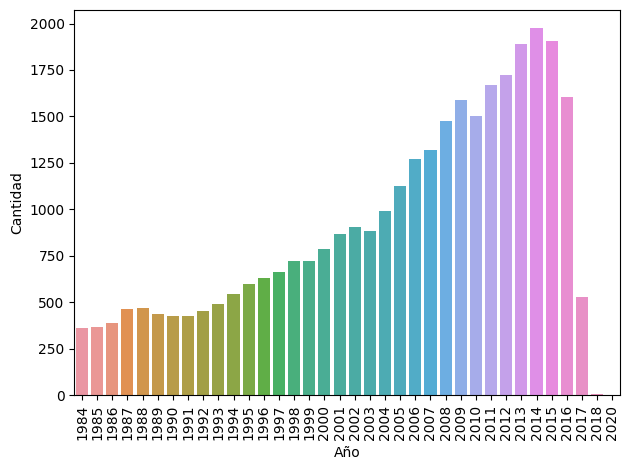

In [17]:
ax = sns.barplot(data=df_movies_count, x='Año', y='Cantidad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

Recaudación total por año (últimos 40 años):

In [18]:
df_movies_recaudacion = df_movies[['release_year', 'revenue']]
df_movies_recaudacion = df_movies_recaudacion.groupby('release_year')['revenue'].sum().reset_index()
df_movies_recaudacion.columns = ['Año', 'Recaudación Total']
df_movies_recaudacion = df_movies_recaudacion[df_movies_recaudacion['Año']>1983]


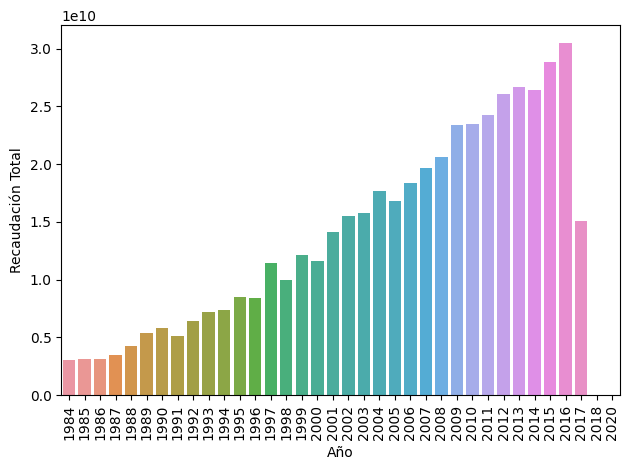

In [19]:
ax = sns.barplot(data=df_movies_recaudacion, x='Año', y='Recaudación Total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()



POPULARIDAD TOTAL ALCANZADA POR DIRECTOR




In [20]:
df_movies_popularidad = df_movies[['popularity', 'crew']]
df_movies_popularidad = df_movies_popularidad.groupby('crew')['popularity'].sum().reset_index()
df_movies_popularidad.columns = ['Director', 'Popularidad Total']
df_movies_popularidad.sort_values(by='Popularidad Total', ascending=False).head(20)


,Director,Popularidad Total
10283,"['Kyle Balda', 'Pierre Coffin']",584.119817
14895,['Ridley Scott'],436.913795
16765,['Steven Spielberg'],423.284711
1974,['Bill Condon'],395.719815
18437,['Woody Allen'],363.398742
3971,['David Fincher'],346.949363
776,['Alfred Hitchcock'],342.960338
3164,['Christopher Nolan'],317.350575
7512,['James Cameron'],312.880743
18828,[],309.312725


Consideraciones finales: el análisis exploratorio presentado es un breve de ejemplo, de cómo podrían utilizarse los recursos adquiridos, y da lugar a nuevos interrogantes a explorar, que por razones de tiempo, quedarán pendientes para un trabajo mas extenso. 